HTTP GET request to URL: https://www.google.com/search?sxsrf=ACYBGNQ16aJKOqQVdyEW9OtCv8zRsBcRig%3A1575650951873&source=hp&ei=h4bqXcT0MuPzqwG87524BQ&q=linux+mint&oq=&gs_l=psy-ab.1.1.35i362i39l10.0.0..139811...4.0..0.0.0.......0......gws-wiz.....10.KwbM7vkMEDs | Status code: 200
hello this is my rtxt <!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>linux mint - Google Search</title><script nonce="U3kP2q_7tfvyfBC229IaHg">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:'EFG0Y7QDpsiQ8g-QxYK4BQ',kEXPI:'31',kBL:'Dl4b'};google.sn='web';google.kHL='en';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNod
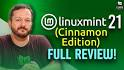
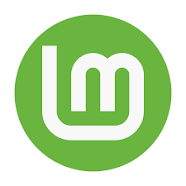
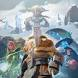
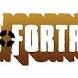
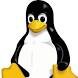
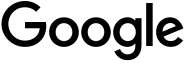
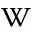
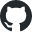
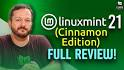
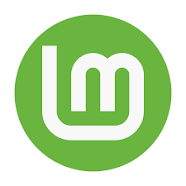
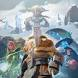
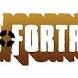
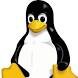
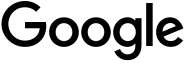
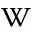
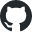
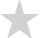
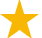
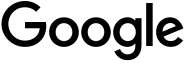
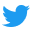
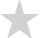
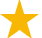
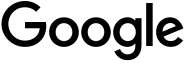
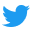
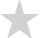
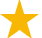
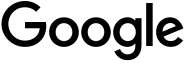
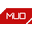
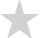
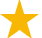
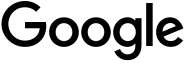
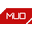
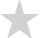
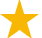
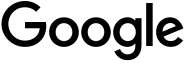
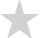
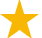
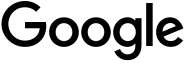
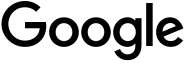
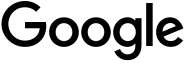

In [1]:
# Libraries
import requests
from bs4 import BeautifulSoup
import json
import csv
import re
import time


class GoogleScraper:
    # Crawler entry point
    base_url = 'https://www.google.com/search'
    
    # Query string parameters to crawl through results pages
    pagination_params = {
        'q': 'linux mint',
        'sxsrf': 'ACYBGNRmhZ3C1fo8pX_gW_d8i4gVeu41Bw:1575654668368',
        'ei': 'DJXqXcmDFumxrgSbnYeQBA',
        'start': '',
        'sa': 'N',
        'ved': '2ahUKEwjJua-Gy6HmAhXpmIsKHZvOAUI4FBDy0wN6BAgMEDI',
        'biw': '811',
        'bih': '628'
    }
    
    # Query string parameters for initial results page
    initial_params = {
        'sxsrf': 'ACYBGNQ16aJKOqQVdyEW9OtCv8zRsBcRig:1575650951873',
        'source': 'hp',
        'ei': 'h4bqXcT0MuPzqwG87524BQ',
        'q': '',
        'oq': '',
        'gs_l': 'psy-ab.1.1.35i362i39l10.0.0..139811...4.0..0.0.0.......0......gws-wiz.....10.KwbM7vkMEDs'
    }
    
    # Request headers
    headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'accept-language': 'en-US,en;q=0.9',
        'cache-control': 'no-cache',
        'cookie': 'CGIC=InZ0ZXh0L2h0bWwsYXBwbGljYXRpb24veGh0bWwreG1sLGFwcGxpY2F0aW9uL3htbDtxPTAuOSxpbWFnZS93ZWJwLGltYWdlL2FwbmcsKi8qO3E9MC44LGFwcGxpY2F0aW9uL3NpZ25lZC1leGNoYW5nZTt2PWIz; HSID=AenmNVZxnoADsXz_x; SSID=AjbLhhwkjh8f3FOM8; APISID=IqkNtUA0V2DXlees/A0tA9iPSadMC2X6dt; SAPISID=8-N4B06I_D5N1mvR/AleccT6Zt0QllrukC; CONSENT=YES+UA.en+; OTZ=5204669_48_48_123900_44_436380; SID=rAd3UAFN_dCIGQ87HqDZZGiNyxdz0dL4dZKy_XquqSr_CHTzqSzfDdNTfLmA2xCMEZOZMA.; ANID=AHWqTUnDWUSHdvWhJiIoPxMAKYXmVtHCQIq7LBMYgiSlZZr3AMGTwY2aVUdjeY7z; NID=193=QImFbOa1vnKpflG8yJytqPXbJYJ9k8fWbIzQMGExsMa4g5oJwdnI56WNjgEVFAyAPJ1SEEOQ-zlW4HAUv-JLj0yAUImTgeT1syDIgFTMWAqxdz10lWRlzFC-3Fmjv6xJcqm2o6RKI50dmb7GetiheNdSAYPkAjng_c0lOHoXZLmtMwFOpkPTrQwVyUW8R2x4o1ux3OW3_kEbR_BREowRV8lVqrsnyo1ffC_Pm40zf81k7aS0cv9esYweGHF6Lxd532z4wA; 1P_JAR=2019-12-06-16; DV=k7BRh0-RaJtZsO9g7sjbrkcKoUjC7RYhxDh5AdfYgQAAAID1UoVsAVkvPgAAAFiry7niUB6qLgAAAGCQehpdCXeKnikKAA; SEARCH_SAMESITE=CgQIvI4B; SIDCC=AN0-TYv-lU3aPGmYLEYXlIiyKMnN1ONMCY6B0h_-owB-csTWTLX4_z2srpvyojjwlrwIi1nLdU4',
        'pragma': 'no-cache',
        'referer': 'https://www.google.com/',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/75.0.3770.142 Chrome/75.0.3770.142 Safari/537.36'
    }
    
    # Scraped results
    results = []
    
    def fetch(self, query, page):
        '''Makes HTTP GET request to fetch search results from google'''
        
        # Init initial_params search query (e.g. "linux mint")
        self.initial_params['q'] = query
        
        # If getting the first results page
        if not page:
            # Use initial params
            params = self.initial_params
        
        # Otherwise we're scraping the following pages
        else:
            # Use pagination params
            params = self.pagination_params
            
            # Specify page number in format page * 10
            params['start'] = str(page * 10)
            
            # Init search query
            params['q'] = query
        
        # Make HTTP GET request
        response = requests.get(self.base_url, params=params, headers=self.headers)
        print('HTTP GET request to URL: %s | Status code: %s' % (response.url, response.status_code))
        
        # Return HTTP response
        return response
        
    def parse(self, html):
        '''Parses response's text and extract data from it'''
        
        # Parse content
        content = BeautifulSoup(html, 'html.parser')
        
        print('hello this is my rtxt',content)

        # Extract data
        title = [title.text for title in content.findAll('span', {'class': 'S3Uucc'})]
        print('hello this is my rtxt',content)

        link = [link.next_element['href'] for link in content.findAll('div', {'class': 'r'})]
        description = [descr.text for descr in content.findAll('span', {'class': 'st'})]
        
        # Loop over the number of entries
        for index in range(0, len(title)):
            # Append extracted data to results list
            self.results.append({
                'title': title[index],
                'link': link[index],
                'description': description[index]
            })
    
    def write_csv(self):
        '''Writes scpared results to CSV file'''
        
        # Check results list in not empty
        if len(self.results):
            print('Writing results to "res.csv"... ', end='')
            
            # Open file stream to write CSV
            with open('res.csv', 'w') as csv_file:
                # Init CSV dictionary writer
                writer = csv.DictWriter(csv_file, fieldnames=self.results[0].keys())
                
                # Write column names to file
                writer.writeheader()
                
                # Write results list to CSV file
                for row in self.results:
                    writer.writerow(row)
            
            print('Done')
       
    def store_response(self, response):
        '''Stores HTML response to file for debugging parser'''
        
        # If response is OK
        if response.status_code == 200:
            print('Saving response to "res.html"... ', end='')
            
            # Write response to HTML file
            with open('res.html', 'w') as html_file:
                html_file.write(response.text)
            
            print('Done')
        else:
            print('Bad response!')
    
    def load_response(self):
        '''Loads HTML response for debugging parser'''
        html = ''
        
        # Open HTML file
        with open('res.html', 'r') as html_file:
            for line in html_file.read():
                html += line
        
        # Return HTML as string
        return html
        
    def run(self):
        '''Starts crawler'''
        
        # Loop over the range of pages to scrape
        for page in range(0, 5):
            # Make HTTP GET request
            response = self.fetch('linux mint', page)
            
            # Parse content
            self.parse(response.text)
            
            # Wait for 5 sec            
            time.sleep(10)
        
        # Write scraped results to CSV file
        self.write_csv()


# Main driver
if __name__ == '__main__':
    scraper = GoogleScraper()
    scraper.run()